In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
covid_date = np.datetime64('2020-04-01T01:00:00.000000+0100')
n_topics = 10

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\18199\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


# WordCloud

In [3]:
def word_cloud(df):
    all_words = ''
    for text in df['text']:
        all_words += ','.join(list(text)) 
        
    print('Total words {}'.format(len(all_words)))
    
    wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=4, scale=3, contour_color='steelblue')
    wordcloud.generate(all_words)
    return wordcloud.to_image()

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA

In [4]:
def lda(df, n_topics=5):
    all_words = []
    for text in df['text']:
        all_words.append(text)
    
    # Create dictionary and corpus
    word2num = cp.Dictionary(all_words)
    texts = all_words
    
    # Get term frequency
    corpus = [word2num.doc2bow(text) for text in texts]
    
    lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
    doc_lda = lda_model[corpus]
    
    print('\nTopics')
    print(lda_model.print_topics())
    
    print('\nScores')
    for i in range(0, len(corpus), 500):
        for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
            print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    
    pyLDAvis.enable_notebook()
    return pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# All

In [5]:
# Need to first get cleaned tokenized text data
uber_df_tk = pd.read_pickle(r'./data/uber_tk.p')

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
wcloud = word_cloud(uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 368139


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


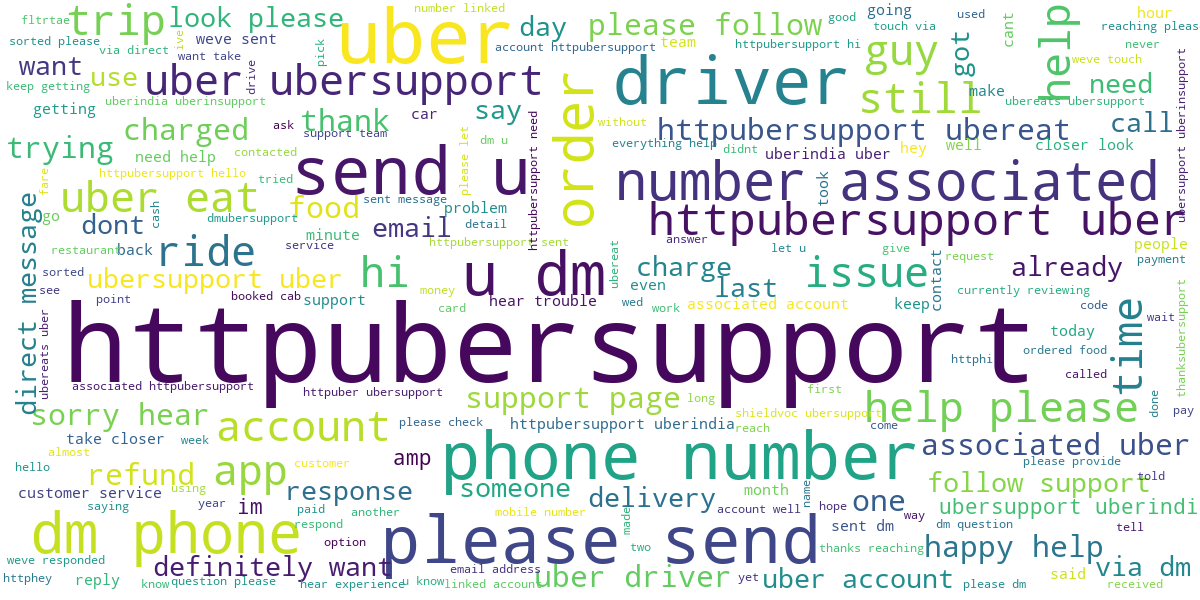

In [7]:
wcloud

In [8]:
LDAvis_prepared = lda(uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.057*"ubersupport" + 0.050*"http" + 0.048*"uber" + 0.029*"number" + 0.024*"phone" + 0.023*"u" + 0.023*"please" + 0.022*"dm" + 0.018*"send" + 0.015*"associated"'), (1, '0.093*"ubersupport" + 0.063*"http" + 0.024*"uber" + 0.018*"please" + 0.016*"dm" + 0.014*"help" + 0.013*"account" + 0.012*"order" + 0.009*"get" + 0.008*"u"'), (2, '0.085*"http" + 0.063*"ubersupport" + 0.024*"please" + 0.015*"ubereats" + 0.014*"help" + 0.013*"uber" + 0.013*"u" + 0.012*"follow" + 0.009*"dm" + 0.009*"hi"'), (3, '0.072*"ubersupport" + 0.046*"http" + 0.033*"uber" + 0.012*"dm" + 0.012*"help" + 0.011*"want" + 0.010*"uberindia" + 0.009*"thanks" + 0.008*"weve" + 0.008*"check"'), (4, '0.093*"ubersupport" + 0.064*"http" + 0.036*"uber" + 0.016*"please" + 0.016*"order" + 0.015*"account" + 0.011*"dm" + 0.010*"help" + 0.009*"time" + 0.009*"u"'), (5, '0.071*"http" + 0.061*"ubersupport" + 0.039*"uber" + 0.014*"uberindia" + 0.013*"driver" + 0.013*"ride" + 0.009*"get" + 0.008*"sorry" + 0.008*"issue" + 0.008*"

Topic: 0.071*"http" + 0.061*"ubersupport" + 0.039*"uber" + 0.014*"uberindia" + 0.013*"driver" + 0.013*"ride" + 0.009*"get" + 0.008*"sorry" + 0.008*"issue" + 0.008*"trip"

Score: 0.0200046356767416	 
Topic: 0.057*"ubersupport" + 0.050*"http" + 0.048*"uber" + 0.029*"number" + 0.024*"phone" + 0.023*"u" + 0.023*"please" + 0.022*"dm" + 0.018*"send" + 0.015*"associated"

Score: 0.7117936015129089	 
Topic: 0.081*"ubersupport" + 0.065*"http" + 0.042*"uber" + 0.013*"driver" + 0.013*"account" + 0.009*"ubereats" + 0.008*"phone" + 0.007*"want" + 0.007*"u" + 0.007*"amp"

Score: 0.2266356498003006	 
Topic: 0.093*"ubersupport" + 0.064*"http" + 0.036*"uber" + 0.016*"please" + 0.016*"order" + 0.015*"account" + 0.011*"dm" + 0.010*"help" + 0.009*"time" + 0.009*"u"

Score: 0.8499416708946228	 
Topic: 0.066*"http" + 0.059*"ubersupport" + 0.042*"uber" + 0.034*"dm" + 0.032*"please" + 0.021*"u" + 0.019*"help" + 0.016*"number" + 0.016*"send" + 0.016*"phone"

Score: 0.016675852239131927	 
Topic: 0.057*"ubersupp


Score: 0.016672465950250626	 
Topic: 0.062*"ubersupport" + 0.057*"http" + 0.038*"uber" + 0.022*"trip" + 0.018*"driver" + 0.011*"help" + 0.009*"dm" + 0.009*"please" + 0.007*"never" + 0.007*"time"

Score: 0.016672253608703613	 
Topic: 0.057*"ubersupport" + 0.050*"http" + 0.048*"uber" + 0.029*"number" + 0.024*"phone" + 0.023*"u" + 0.023*"please" + 0.022*"dm" + 0.018*"send" + 0.015*"associated"


In [9]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.073051  0.002620       1        1  14.146296
2     -0.026716  0.039562       2        1  13.372630
4     -0.014531  0.014748       3        1  12.965716
8     -0.000061  0.005764       4        1  12.590410
1     -0.030804  0.047002       5        1  11.842168
7     -0.006736  0.005731       6        1   9.284220
0     -0.069350 -0.090673       7        1   7.921929
5      0.102359 -0.029801       8        1   6.437245
9      0.064938 -0.051041       9        1   6.019264
3      0.053952  0.056088      10        1   5.420121, topic_info=            Term         Freq        Total Category  logprob  loglift
23          uber  1827.000000  1827.000000  Default  30.0000  30.0000
24   ubersupport  3945.000000  3945.000000  Default  29.0000  29.0000
195         trip   246.000000   246.000000  Default  28.0000  28.0000
36            dm   732.000000   732.000000  Default  27.0000  27.0000
39        number   502.000000   502.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
8            app    11.871271   211.665096  Topic10  -5.4889   0.0342
152     response    10.910875   169.729136  Topic10  -5.5733   0.1706
75            hi    11.035552   364.147536  Topic10  -5.5619  -0.5814
103         hour    10.222394   161.465701  Topic10  -5.6385   0.1553
282         need    10.044665   190.895547  Topic10  -5.6560  -0.0296

[820 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
4437      4  0.826059         aampress
2797      1  0.634039       abkgardner
137       1  0.172519       absolutely
137       2  0.115012       absolutely
137       3  0.115012       absolutely
...     ...       ...              ...
3214      9  0.342812  zhenyalindgardt
3214     10  0.057135  zhenyalindgardt
3394      1  0.594396             zoom
3394      4  0.198132             zoom
1012      5  0.689832             über

[2082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 9, 2, 8, 1, 6, 10, 4])

In [10]:
pyLDAvis.save_html(LDAvis_prepared,'./html/all_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# To Uber

In [11]:
to_uber_df_tk = uber_df_tk[uber_df_tk['target'] == 'Uber_Support']

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
to_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source            source_id        target   target_id  \
4        SatishInnov8   722043526461145088  Uber_Support  2815754953   
15     James_Carleton            247005181  Uber_Support  2815754953   
18    SajeshSreejayan             96289683  Uber_Support  2815754953   
19     iVigneshSuresh             59047875  Uber_Support  2815754953   
20     iVigneshSuresh             59047875  Uber_Support  2815754953   
...               ...                  ...           ...         ...   
5562     Iam_bahuguna  1094093461631000576  Uber_Support  2815754953   
5563         ajb_neuk  1344742630731747328  Uber_Support  2815754953   
5564   AdrianMatache7  1376698104028794882  Uber_Support  2815754953   
5565           k_sovs  1369169148580823040  Uber_Support  2815754953   
5566        MY0U1SANA   918655647763324928  Uber_Support  2815754953   

     type_of_content          created_at  \
4              Reply 2019-12-09 17:11:51   
15             Reply 2019-12-28 03:34:47   
18             Reply 2019-12-28 06:53:00   
19             Reply 2019-12-28 09:56:17   
20             Reply 2019-12-28 09:56:17   
...              ...                 ...   
5562           Reply 2021-03-31 17:09:05   
5563           Reply 2021-03-31 17:15:48   
5564           Reply 2021-03-31 17:18:34   
5565           Reply 2021-03-31 17:19:01   
5566           Reply 2021-03-31 17:22:01   

                                               all_data  \
4     {'created_at': 'Mon Dec 09 17:11:51 +0000 2019...   
15    {'created_at': 'Sat Dec 28 03:34:47 +0000 2019...   
18    {'created_at': 'Sat Dec 28 06:53:00 +0000 2019...   
19    {'created_at': 'Sat Dec 28 09:56:17 +0000 2019...   
20    {'created_at': 'Sat Dec 28 09:56:17 +0000 2019...   
...                                                 ...   
5562  {'created_at': 'Wed Mar 31 17:09:05 +0000 2021...   
5563  {'created_at': 'Wed Mar 31 17:15:48 +0000 2021...   
5564  {'created_at': 'Wed Mar 31 17:18:34 +0000 2021...   
5565  {'created_at': 'Wed Mar 31 17:19:01 +0000 2021...   
5566  {'created_at': 'Wed Mar 31 17:22:01 +0000 2021...   

                                                   text  
4     [ubersupport, wish, respectfully, state, regul...  
15    [ubersupport, ubereats, mcdonaldscanada, hi, t...  
18    [ubersupport, awesome, partner, asks, destinat...  
19    [ubersupport, ubersupport, uberindia, apart, s...  
20    [ubersupport, ubersupport, uberindia, apart, s...  
...                                                 ...  
5562  [ubersupport, refused, move, even, minute, ask...  
5563  [ubersupport, yeah, cause, link, useful, suppo...  
5564  [ubersupport, hi, guy, long, take, bank, accou...  
5565  [ubersupport, filled, form, many, time, response]  
5566                       [ubersupport, fltrtae, hold]  

[3245 rows x 8 columns]

In [13]:
wcloud = word_cloud(to_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 202701


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


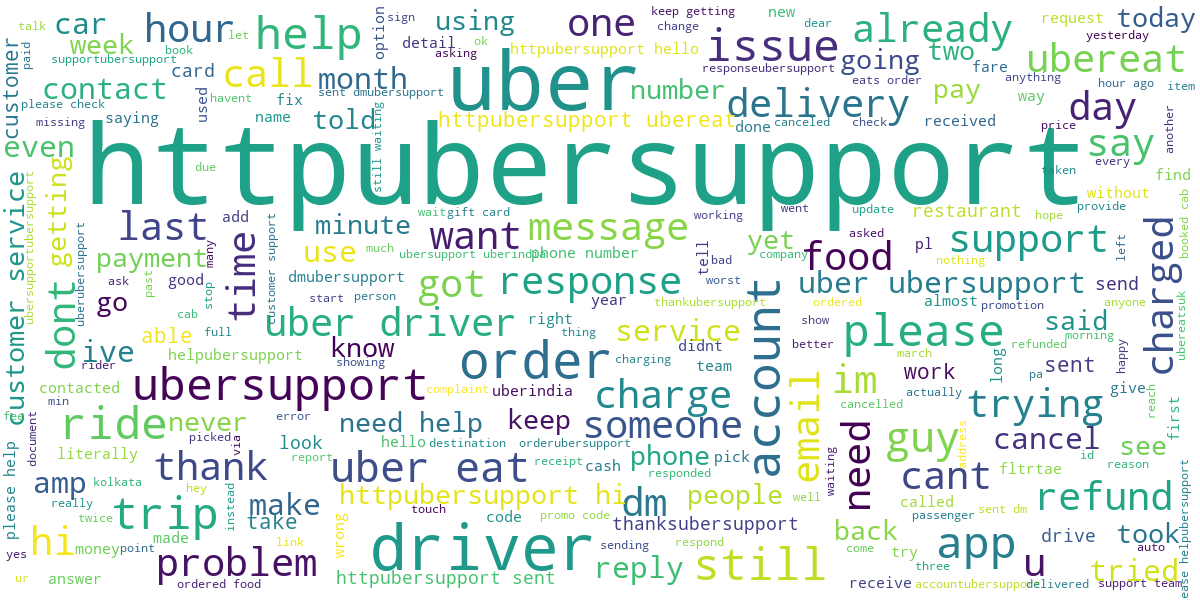

In [14]:
wcloud

In [15]:
LDAvis_prepared = lda(to_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.116*"ubersupport" + 0.060*"http" + 0.037*"uber" + 0.014*"account" + 0.014*"driver" + 0.009*"order" + 0.009*"get" + 0.009*"still" + 0.008*"ride" + 0.008*"please"'), (1, '0.101*"ubersupport" + 0.049*"http" + 0.036*"uber" + 0.017*"order" + 0.012*"contact" + 0.011*"trip" + 0.010*"sent" + 0.010*"help" + 0.008*"get" + 0.007*"need"'), (2, '0.107*"ubersupport" + 0.060*"http" + 0.021*"driver" + 0.018*"uber" + 0.014*"hi" + 0.013*"dm" + 0.011*"please" + 0.010*"ubereats" + 0.007*"guy" + 0.006*"support"'), (3, '0.081*"ubersupport" + 0.050*"http" + 0.013*"help" + 0.011*"order" + 0.011*"driver" + 0.008*"uber" + 0.008*"hour" + 0.007*"app" + 0.007*"account" + 0.006*"yet"'), (4, '0.105*"ubersupport" + 0.077*"http" + 0.029*"uber" + 0.016*"driver" + 0.014*"help" + 0.012*"please" + 0.010*"issue" + 0.009*"need" + 0.008*"app" + 0.007*"order"'), (5, '0.070*"ubersupport" + 0.037*"http" + 0.016*"uber" + 0.013*"order" + 0.012*"guy" + 0.009*"account" + 0.009*"keep" + 0.008*"support" + 0.008*"issue

In [16]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.037661  0.013792       1        1  25.068577
4      0.044894  0.009522       2        1  19.674698
2      0.043416  0.005439       3        1  13.357637
8      0.038850  0.004537       4        1   9.104030
1      0.037484  0.049025       5        1   8.449783
7      0.018215 -0.018334       6        1   8.315067
3     -0.008554 -0.082573       7        1   5.335224
6     -0.039590 -0.048195       8        1   4.265521
5     -0.082757  0.074050       9        1   3.717374
9     -0.089620 -0.007262      10        1   2.712090, topic_info=            Term         Freq        Total Category  logprob  loglift
8    ubersupport  2930.000000  2930.000000  Default  30.0000  30.0000
7           uber   837.000000   837.000000  Default  29.0000  29.0000
1           http  1720.000000  1720.000000  Default  28.0000  28.0000
152        order   278.000000   278.000000  Default  27.0000  27.0000
121       driver   400.000000   400.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
179        phone     2.985475    92.892750  Topic10  -5.5726   0.1698
94          dont     2.697846    65.469017  Topic10  -5.6739   0.4183
285      service     2.697433   114.269221  Topic10  -5.6740  -0.1388
100         ride     2.697866   146.427693  Topic10  -5.6739  -0.3866
104         sent     2.697782   143.228434  Topic10  -5.6739  -0.3646

[803 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
385       1  0.126612   able
385       2  0.202579   able
385       3  0.075967   able
385       4  0.101289   able
385       5  0.329190   able
...     ...       ...    ...
702       7  0.190901    yet
702       9  0.057270    yet
384       1  0.191689  youve
384       2  0.766757  youve
2806      2  0.753288   zoom

[1954 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 9, 2, 8, 4, 7, 6, 10])

In [17]:
pyLDAvis.save_html(LDAvis_prepared,'./html/to_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# From Uber

In [18]:
from_uber_df_tk = uber_df_tk[uber_df_tk['source'] == 'Uber_Support']

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
from_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source   source_id           target            target_id  \
0     Uber_Support  2815754953    wordofbrandon           2566081240   
1     Uber_Support  2815754953    wordofbrandon           2566081240   
2     Uber_Support  2815754953        CapeVgirl            719534538   
3     Uber_Support  2815754953        CapeVgirl            719534538   
5     Uber_Support  2815754953       realchetty             28766827   
...            ...         ...              ...                  ...   
5551  Uber_Support  2815754953     CVREENSWORLD  1352048476339761153   
5552  Uber_Support  2815754953       makaylabez            303867642   
5553  Uber_Support  2815754953         ajb_neuk  1344742630731747328   
5554  Uber_Support  2815754953          Nezz911            429610920   
5556  Uber_Support  2815754953  Vinaysh96437585  1270757913905131520   

     type_of_content          created_at  \
0              Reply 2019-08-31 10:53:53   
1              Reply 2019-08-31 10:53:53   
2              Reply 2019-10-01 07:45:30   
3              Reply 2019-10-01 07:45:30   
5              Reply 2019-12-20 12:02:54   
...              ...                 ...   
5551           Reply 2021-03-31 16:54:36   
5552           Reply 2021-03-31 16:55:35   
5553           Reply 2021-03-31 16:55:49   
5554           Reply 2021-03-31 16:57:30   
5556           Reply 2021-03-31 17:02:49   

                                               all_data  \
0     {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
1     {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
2     {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
3     {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
5     {'created_at': 'Fri Dec 20 12:02:54 +0000 2019...   
...                                                 ...   
5551  {'created_at': 'Wed Mar 31 16:54:36 +0000 2021...   
5552  {'created_at': 'Wed Mar 31 16:55:35 +0000 2021...   
5553  {'created_at': 'Wed Mar 31 16:55:49 +0000 2021...   
5554  {'created_at': 'Wed Mar 31 16:57:30 +0000 2021...   
5556  {'created_at': 'Wed Mar 31 17:02:49 +0000 2021...   

                                                   text  
0     [wordofbrandon, thanks, bringing, attention, w...  
1     [wordofbrandon, thanks, bringing, attention, w...  
2     [capevgirl, help, suggest, restarting, app, wo...  
3     [capevgirl, help, suggest, restarting, app, wo...  
5     [realchetty, definitely, want, ensure, address...  
...                                                 ...  
5551  [cvreensworld, hi, cvreeny, happy, help, pleas...  
5552  [makaylabez, happy, help, makayla, please, sen...  
5553  [ajbneuk, hi, happy, help, please, follow, sup...  
5554                                  [hi, neo, assist]  
5556  [definitely, want, ensure, addressed, appropri...  

[1153 rows x 8 columns]

In [20]:
wcloud = word_cloud(from_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 81444


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


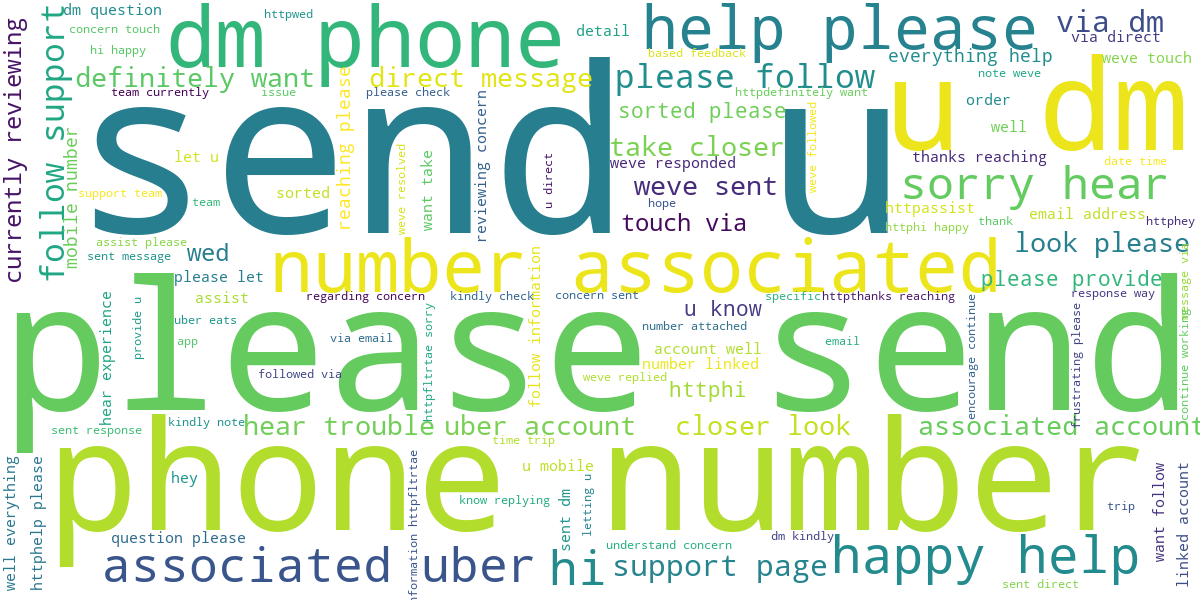

In [21]:
wcloud

In [22]:
LDAvis_prepared = lda(from_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.062*"u" + 0.047*"please" + 0.043*"send" + 0.039*"dm" + 0.033*"http" + 0.027*"number" + 0.025*"phone" + 0.018*"regarding" + 0.018*"weve" + 0.018*"assist"'), (1, '0.065*"http" + 0.048*"please" + 0.038*"dm" + 0.028*"u" + 0.025*"weve" + 0.021*"via" + 0.018*"want" + 0.018*"thanks" + 0.018*"touch" + 0.015*"number"'), (2, '0.080*"http" + 0.045*"u" + 0.045*"please" + 0.044*"phone" + 0.042*"dm" + 0.042*"help" + 0.040*"send" + 0.040*"number" + 0.038*"associated" + 0.021*"uber"'), (3, '0.021*"u" + 0.021*"assist" + 0.020*"http" + 0.018*"get" + 0.015*"hey" + 0.014*"please" + 0.013*"send" + 0.013*"concern" + 0.013*"reviewing" + 0.013*"currently"'), (4, '0.028*"via" + 0.027*"weve" + 0.025*"http" + 0.023*"dm" + 0.021*"thanks" + 0.017*"currently" + 0.017*"dodiesue" + 0.013*"u" + 0.013*"help" + 0.013*"concern"'), (5, '0.060*"http" + 0.046*"u" + 0.045*"please" + 0.034*"dm" + 0.034*"number" + 0.029*"send" + 0.028*"phone" + 0.023*"associated" + 0.022*"hey" + 0.021*"weve"'), (6, '0.093*"http

In [23]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.092542  0.008332       1        1  24.677041
9      0.086606 -0.032914       2        1  24.500490
6      0.109335 -0.070075       3        1  12.281450
5      0.041095  0.049953       4        1   8.597101
8     -0.062701  0.119559       5        1   7.761814
1      0.009883  0.047808       6        1   6.963670
0      0.041559  0.010816       7        1   6.717096
7     -0.004248 -0.034980       8        1   5.076513
4     -0.179224 -0.018752       9        1   1.783013
3     -0.134847 -0.079746      10        1   1.641813, topic_info=           Term        Freq       Total Category  logprob  loglift
248        weve  188.000000  188.000000  Default  30.0000  30.0000
222          hi  178.000000  178.000000  Default  29.0000  29.0000
32            u  493.000000  493.000000  Default  28.0000  28.0000
25           dm  483.000000  483.000000  Default  27.0000  27.0000
65          via  159.000000  159.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
10         help    1.219686  320.289777  Topic10  -5.1224  -1.4613
59   associated    0.934144  243.439444  Topic10  -5.3891  -1.4536
29        phone    0.933216  347.281128  Topic10  -5.3901  -1.8099
28       number    0.929744  369.009494  Topic10  -5.3938  -1.8743
60         uber    0.914079  168.936443  Topic10  -5.4108  -1.1100

[699 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1032      4  0.542557  abhiikaushikk
751       8  0.719647     abkgardner
61        2  0.198588     absolutely
61        3  0.198588     absolutely
61        4  0.264784     absolutely
...     ...       ...            ...
821       4  0.542556            yur
449       3  0.822299            zac
269       3  0.283286           zaid
269       8  0.566573           zaid
1244      6  0.579099     zirachukwu

[1198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 7, 6, 9, 2, 1, 8, 5, 4])

In [24]:
pyLDAvis.save_html(LDAvis_prepared,'./html/from_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# To Uber Pre-COVID

In [25]:
pre_to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support') & (uber_df_tk['created_at'] <= covid_date)]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
pre_to_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source           source_id        target   target_id  \
4       SatishInnov8  722043526461145088  Uber_Support  2815754953   
15    James_Carleton           247005181  Uber_Support  2815754953   
18   SajeshSreejayan            96289683  Uber_Support  2815754953   
19    iVigneshSuresh            59047875  Uber_Support  2815754953   
20    iVigneshSuresh            59047875  Uber_Support  2815754953   
..               ...                 ...           ...         ...   
655         ImAndreM           283383158  Uber_Support  2815754953   
656        Bigmanpfc            21190526  Uber_Support  2815754953   
657     hegemonprime           286568999  Uber_Support  2815754953   
658        jstocks21          1619318929  Uber_Support  2815754953   
659   lordsarcastico           141914172  Uber_Support  2815754953   

    type_of_content          created_at  \
4             Reply 2019-12-09 17:11:51   
15            Reply 2019-12-28 03:34:47   
18            Reply 2019-12-28 06:53:00   
19            Reply 2019-12-28 09:56:17   
20            Reply 2019-12-28 09:56:17   
..              ...                 ...   
655           Reply 2019-12-31 23:27:48   
656           Reply 2019-12-31 23:31:15   
657           Reply 2019-12-31 23:51:09   
658           Reply 2019-12-31 23:51:59   
659           Reply 2019-12-31 23:58:55   

                                              all_data  \
4    {'created_at': 'Mon Dec 09 17:11:51 +0000 2019...   
15   {'created_at': 'Sat Dec 28 03:34:47 +0000 2019...   
18   {'created_at': 'Sat Dec 28 06:53:00 +0000 2019...   
19   {'created_at': 'Sat Dec 28 09:56:17 +0000 2019...   
20   {'created_at': 'Sat Dec 28 09:56:17 +0000 2019...   
..                                                 ...   
655  {'created_at': 'Tue Dec 31 23:27:48 +0000 2019...   
656  {'created_at': 'Tue Dec 31 23:31:15 +0000 2019...   
657  {'created_at': 'Tue Dec 31 23:51:09 +0000 2019...   
658  {'created_at': 'Tue Dec 31 23:51:59 +0000 2019...   
659  {'created_at': 'Tue Dec 31 23:58:55 +0000 2019...   

                                                  text  
4    [ubersupport, wish, respectfully, state, regul...  
15   [ubersupport, ubereats, mcdonaldscanada, hi, t...  
18   [ubersupport, awesome, partner, asks, destinat...  
19   [ubersupport, ubersupport, uberindia, apart, s...  
20   [ubersupport, ubersupport, uberindia, apart, s...  
..                                                 ...  
655  [ubersupport, uber, eats, order, stuck, hour, ...  
656  [ubersupport, ask, different, wife, tweeted, r...  
657  [ubersupport, hey, trying, update, platform, i...  
658  [ubersupport, response, gotten, everyone, one,...  
659  [ubersupport, hi, uber, still, asking, questio...  

[480 rows x 8 columns]

In [27]:
wcloud = word_cloud(pre_to_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 33251


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


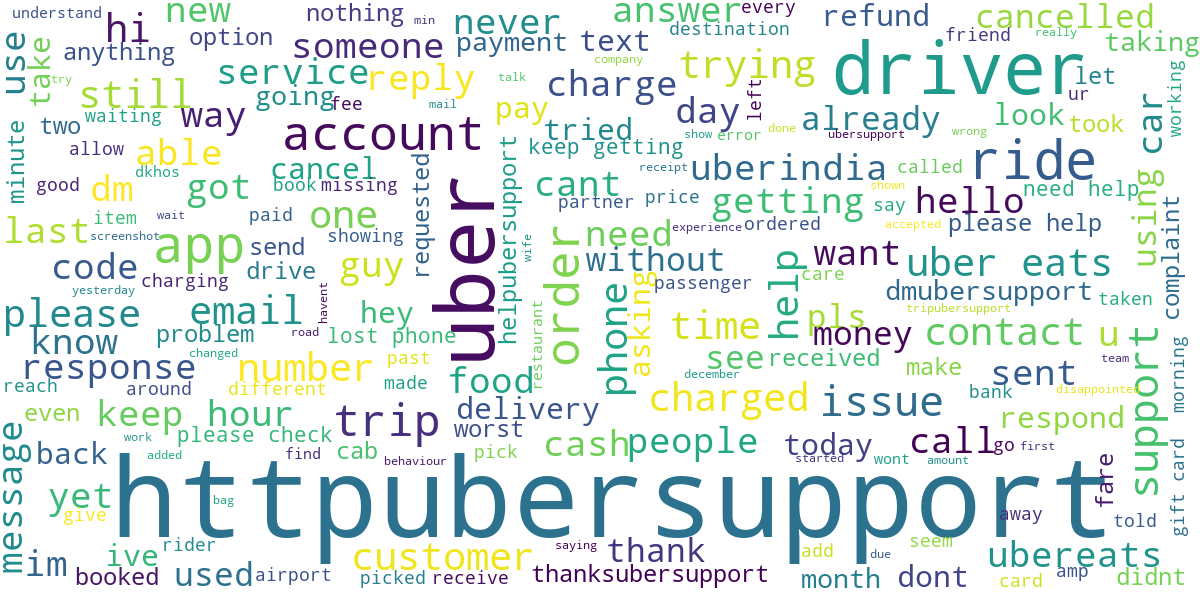

In [28]:
wcloud

In [29]:
LDAvis_prepared = lda(pre_to_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.050*"ubersupport" + 0.013*"http" + 0.013*"answer" + 0.013*"money" + 0.013*"issue" + 0.009*"driver" + 0.009*"help" + 0.009*"around" + 0.009*"rider" + 0.009*"refuse"'), (1, '0.100*"ubersupport" + 0.059*"http" + 0.018*"uber" + 0.018*"driver" + 0.012*"ride" + 0.011*"please" + 0.008*"app" + 0.008*"order" + 0.008*"contact" + 0.008*"help"'), (2, '0.051*"ubersupport" + 0.023*"uber" + 0.023*"http" + 0.016*"driver" + 0.015*"trying" + 0.013*"phone" + 0.013*"order" + 0.011*"u" + 0.008*"eats" + 0.008*"connect"'), (3, '0.073*"ubersupport" + 0.036*"http" + 0.035*"uber" + 0.011*"get" + 0.011*"support" + 0.011*"ride" + 0.010*"time" + 0.009*"help" + 0.009*"app" + 0.009*"phone"'), (4, '0.070*"ubersupport" + 0.035*"http" + 0.035*"uber" + 0.016*"account" + 0.013*"driver" + 0.009*"help" + 0.009*"trip" + 0.009*"service" + 0.008*"number" + 0.008*"able"'), (5, '0.070*"ubersupport" + 0.043*"http" + 0.027*"uber" + 0.020*"driver" + 0.009*"code" + 0.008*"app" + 0.008*"cash" + 0.007*"payment" + 0.00

In [30]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.063203 -0.046536       1        1  32.477266
6      0.048422 -0.058079       2        1  21.485916
3      0.109274  0.052090       3        1   9.141706
4     -0.014448 -0.063964       4        1   7.021308
5     -0.049413 -0.003575       5        1   6.731012
7     -0.032853  0.002760       6        1   6.597266
9     -0.049276 -0.055175       7        1   5.200508
8      0.014739  0.066062       8        1   4.855875
2     -0.030951  0.057855       9        1   3.937993
0     -0.058698  0.048562      10        1   2.551149, topic_info=            Term        Freq       Total Category  logprob  loglift
8    ubersupport  385.000000  385.000000  Default   30.000  30.0000
7           uber  115.000000  115.000000  Default   29.000  29.0000
1           http  251.000000  251.000000  Default   28.000  28.0000
121       driver   75.000000   75.000000  Default   27.000  27.0000
69       account   33.000000   33.000000  Default   26.000  26.0000
..           ...         ...         ...      ...      ...      ...
67        thanks    0.567219   11.950860  Topic10   -5.375   0.6208
17            hi    0.567207   19.004487  Topic10   -5.375   0.1569
54           add    0.567203    5.288852  Topic10   -5.375   1.4360
184         card    0.567202    9.061201  Topic10   -5.375   0.8976
55          code    0.567198   11.138148  Topic10   -5.375   0.6912

[648 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
385       1  0.095289   able
385       2  0.190579   able
385       3  0.190579   able
385       4  0.285868   able
385       6  0.190579   able
...     ...       ...    ...
702       2  0.292358    yet
702       4  0.097453    yet
702       5  0.097453    yet
702       8  0.097453    yet
781       4  0.686920  youre

[1043 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 4, 5, 6, 8, 10, 9, 3, 1])

In [31]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_to_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# To Uber Post-COVID

In [32]:
post_to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support') & (uber_df_tk['created_at'] > covid_date)]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
post_to_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source            source_id        target   target_id  \
690   Arshdee12667790  1324955159395356672  Uber_Support  2815754953   
695   AbdulRa10911356  1343811137159258112  Uber_Support  2815754953   
696   AbdulRa10911356  1343811137159258112  Uber_Support  2815754953   
699         ZaidAmir7             37367374  Uber_Support  2815754953   
700         ZaidAmir7             37367374  Uber_Support  2815754953   
...               ...                  ...           ...         ...   
5562     Iam_bahuguna  1094093461631000576  Uber_Support  2815754953   
5563         ajb_neuk  1344742630731747328  Uber_Support  2815754953   
5564   AdrianMatache7  1376698104028794882  Uber_Support  2815754953   
5565           k_sovs  1369169148580823040  Uber_Support  2815754953   
5566        MY0U1SANA   918655647763324928  Uber_Support  2815754953   

     type_of_content          created_at  \
690            Reply 2020-12-29 02:49:31   
695            Reply 2020-12-29 07:14:44   
696            Reply 2020-12-29 07:17:23   
699            Reply 2020-12-29 08:36:09   
700            Reply 2020-12-29 08:37:44   
...              ...                 ...   
5562           Reply 2021-03-31 17:09:05   
5563           Reply 2021-03-31 17:15:48   
5564           Reply 2021-03-31 17:18:34   
5565           Reply 2021-03-31 17:19:01   
5566           Reply 2021-03-31 17:22:01   

                                               all_data  \
690   {'created_at': 'Tue Dec 29 02:49:31 +0000 2020...   
695   {'created_at': 'Tue Dec 29 07:14:44 +0000 2020...   
696   {'created_at': 'Tue Dec 29 07:17:23 +0000 2020...   
699   {'created_at': 'Tue Dec 29 08:36:09 +0000 2020...   
700   {'created_at': 'Tue Dec 29 08:37:44 +0000 2020...   
...                                                 ...   
5562  {'created_at': 'Wed Mar 31 17:09:05 +0000 2021...   
5563  {'created_at': 'Wed Mar 31 17:15:48 +0000 2021...   
5564  {'created_at': 'Wed Mar 31 17:18:34 +0000 2021...   
5565  {'created_at': 'Wed Mar 31 17:19:01 +0000 2021...   
5566  {'created_at': 'Wed Mar 31 17:22:01 +0000 2021...   

                                                   text  
690   [ubersupport, used, work, southaustralia, move...  
695   [ubersupport, sir, issue, driver, app, please,...  
696     [ubersupport, driver, app, issue, please, help]  
699   [ubersupport, yeah, got, response, show, read,...  
700   [ubersupport, someone, somewhere, else, talk, ...  
...                                                 ...  
5562  [ubersupport, refused, move, even, minute, ask...  
5563  [ubersupport, yeah, cause, link, useful, suppo...  
5564  [ubersupport, hi, guy, long, take, bank, accou...  
5565  [ubersupport, filled, form, many, time, response]  
5566                       [ubersupport, fltrtae, hold]  

[2765 rows x 8 columns]

In [34]:
wcloud = word_cloud(from_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 81444


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


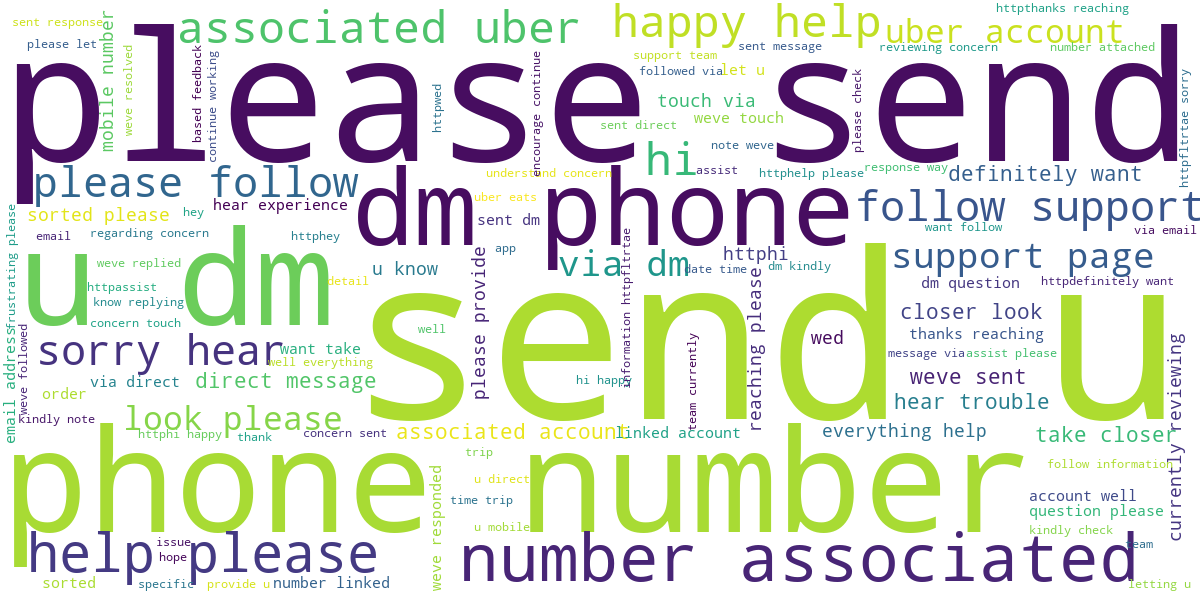

In [35]:
wcloud

In [36]:
LDAvis_prepared = lda(post_to_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.088*"ubersupport" + 0.023*"uber" + 0.022*"http" + 0.016*"need" + 0.014*"help" + 0.012*"dm" + 0.009*"food" + 0.009*"support" + 0.008*"driver" + 0.008*"still"'), (1, '0.080*"ubersupport" + 0.065*"uber" + 0.061*"http" + 0.016*"driver" + 0.007*"please" + 0.006*"service" + 0.006*"uberindia" + 0.005*"response" + 0.005*"want" + 0.005*"said"'), (2, '0.113*"ubersupport" + 0.065*"http" + 0.037*"uber" + 0.017*"help" + 0.016*"driver" + 0.011*"order" + 0.009*"please" + 0.008*"support" + 0.008*"get" + 0.008*"still"'), (3, '0.067*"ubersupport" + 0.032*"http" + 0.022*"uber" + 0.017*"please" + 0.010*"driver" + 0.009*"ubereats" + 0.009*"time" + 0.008*"id" + 0.008*"got" + 0.008*"order"'), (4, '0.082*"ubersupport" + 0.050*"http" + 0.030*"uber" + 0.012*"driver" + 0.010*"waiting" + 0.009*"dont" + 0.009*"im" + 0.008*"response" + 0.007*"time" + 0.007*"service"'), (5, '0.126*"ubersupport" + 0.069*"http" + 0.026*"uber" + 0.014*"order" + 0.012*"sent" + 0.012*"dm" + 0.011*"driver" + 0.011*"account

In [37]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.046066  0.015210       1        1  29.017038
2     -0.044524  0.016487       2        1  25.503658
7     -0.041846  0.069686       3        1   9.084621
8     -0.047045  0.010768       4        1   8.328729
1     -0.047248 -0.072762       5        1   7.461494
6      0.002555  0.043220       6        1   5.554566
4     -0.017080 -0.074363       7        1   5.427823
0      0.073261 -0.014036       8        1   3.678768
3      0.062483 -0.010608       9        1   3.625746
9      0.105510  0.016398      10        1   2.317558, topic_info=            Term         Freq        Total Category  logprob  loglift
5    ubersupport  2461.000000  2461.000000  Default  30.0000  30.0000
50          uber   705.000000   705.000000  Default  29.0000  29.0000
1           http  1425.000000  1425.000000  Default  28.0000  28.0000
14        please   191.000000   191.000000  Default  27.0000  27.0000
293         need   130.000000   130.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
18           got     1.876867    83.535783  Topic10  -5.6983  -0.0310
327          two     1.784414    35.862077  Topic10  -5.7488   0.7641
109        thank     1.784283    56.925899  Topic10  -5.7489   0.3019
16        thanks     1.784232    62.000162  Topic10  -5.7489   0.2165
54         check     1.784217    54.451475  Topic10  -5.7489   0.3463

[770 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1043      1  0.598590  accidentally
0         1  0.459931       account
0         2  0.227055       account
0         3  0.081507       account
0         4  0.040753       account
...     ...       ...           ...
275       5  0.188540           yet
275       7  0.047135           yet
275       8  0.023567           yet
275       9  0.141405           yet
275      10  0.070702           yet

[1731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 8, 9, 2, 7, 5, 1, 4, 10])

In [38]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_to_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# From Uber Pre-COVID

In [39]:
pre_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support') & (uber_df_tk['created_at'] <= covid_date)]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
pre_from_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source   source_id          target            target_id  \
0    Uber_Support  2815754953   wordofbrandon           2566081240   
1    Uber_Support  2815754953   wordofbrandon           2566081240   
2    Uber_Support  2815754953       CapeVgirl            719534538   
3    Uber_Support  2815754953       CapeVgirl            719534538   
5    Uber_Support  2815754953      realchetty             28766827   
..            ...         ...             ...                  ...   
651  Uber_Support  2815754953  lordsarcastico            141914172   
652  Uber_Support  2815754953  lordsarcastico            141914172   
654  Uber_Support  2815754953       Bigmanpfc             21190526   
662  Uber_Support  2815754953        matdel69  1237136270767382529   
663  Uber_Support  2815754953        matdel69  1237136270767382529   

    type_of_content          created_at  \
0             Reply 2019-08-31 10:53:53   
1             Reply 2019-08-31 10:53:53   
2             Reply 2019-10-01 07:45:30   
3             Reply 2019-10-01 07:45:30   
5             Reply 2019-12-20 12:02:54   
..              ...                 ...   
651           Reply 2019-12-31 23:07:11   
652           Reply 2019-12-31 23:07:11   
654           Reply 2019-12-31 23:26:05   
662           Reply 2020-03-09 22:13:45   
663           Reply 2020-03-09 22:13:45   

                                              all_data  \
0    {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
1    {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
2    {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
3    {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
5    {'created_at': 'Fri Dec 20 12:02:54 +0000 2019...   
..                                                 ...   
651  {'created_at': 'Tue Dec 31 23:07:11 +0000 2019...   
652  {'created_at': 'Tue Dec 31 23:07:11 +0000 2019...   
654  {'created_at': 'Tue Dec 31 23:26:05 +0000 2019...   
662  {'created_at': 'Mon Mar 09 22:13:45 +0000 2020...   
663  {'created_at': 'Mon Mar 09 22:13:45 +0000 2020...   

                                                  text  
0    [wordofbrandon, thanks, bringing, attention, w...  
1    [wordofbrandon, thanks, bringing, attention, w...  
2    [capevgirl, help, suggest, restarting, app, wo...  
3    [capevgirl, help, suggest, restarting, app, wo...  
5    [realchetty, definitely, want, ensure, address...  
..                                                 ...  
651  [lordsarcastico, take, closer, look, lordsarca...  
652  [lordsarcastico, take, closer, look, lordsarca...  
654  [bigmanpfc, definitely, understand, concern, h...  
662  [absolutely, want, take, closer, look, please,...  
663  [absolutely, want, take, closer, look, please,...  

[98 rows x 8 columns]

In [41]:
wcloud = word_cloud(pre_from_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 7647


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


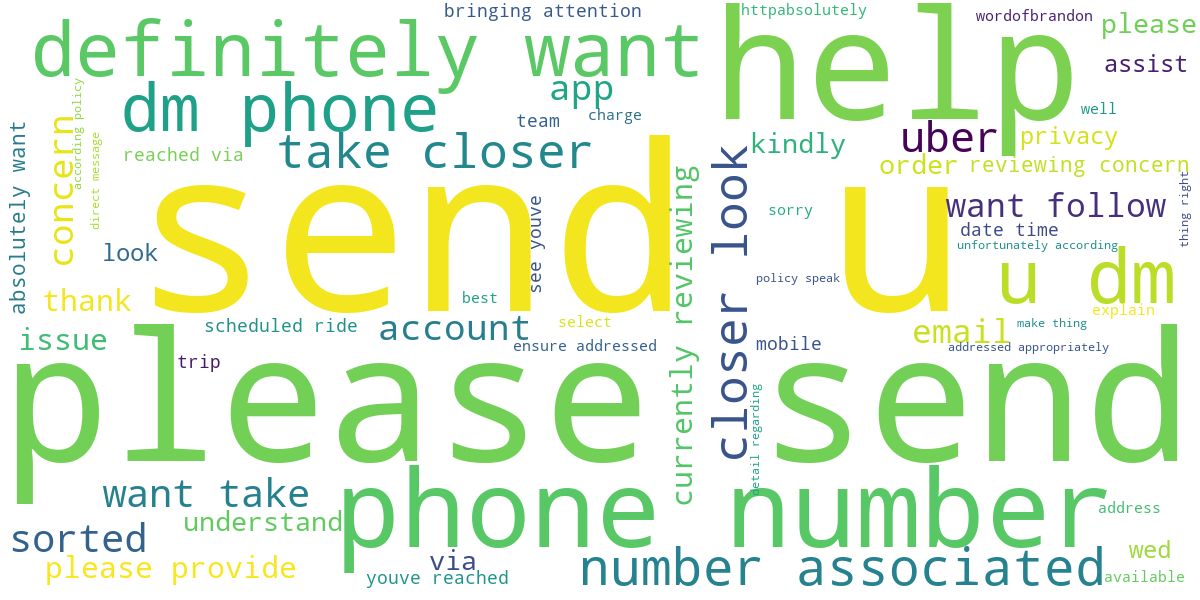

In [42]:
wcloud

In [43]:
LDAvis_prepared = lda(pre_from_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.054*"http" + 0.045*"u" + 0.045*"please" + 0.034*"want" + 0.028*"sajanderson" + 0.025*"sorted" + 0.025*"get" + 0.024*"concern" + 0.024*"definitely" + 0.021*"number"'), (1, '0.060*"http" + 0.045*"u" + 0.029*"take" + 0.029*"gaiainma" + 0.029*"esemee" + 0.029*"kindly" + 0.018*"date" + 0.018*"like" + 0.018*"send" + 0.018*"wed"'), (2, '0.063*"please" + 0.057*"http" + 0.052*"dm" + 0.052*"u" + 0.046*"send" + 0.041*"number" + 0.041*"phone" + 0.034*"definitely" + 0.034*"want" + 0.029*"assist"'), (3, '0.066*"http" + 0.027*"u" + 0.027*"help" + 0.020*"want" + 0.020*"definitely" + 0.020*"dodiesue" + 0.020*"jeremycushman" + 0.020*"look" + 0.020*"fee" + 0.020*"gardegar"'), (4, '0.072*"http" + 0.053*"please" + 0.053*"u" + 0.044*"look" + 0.042*"send" + 0.041*"take" + 0.040*"closer" + 0.035*"number" + 0.033*"want" + 0.025*"absolutely"'), (5, '0.065*"http" + 0.033*"want" + 0.033*"dodiesue" + 0.033*"npteggchaser" + 0.033*"available" + 0.017*"u" + 0.017*"help" + 0.017*"currently" + 0.017*"de

In [44]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.138921 -0.056380       1        1  21.336091
8     -0.090929  0.041038       2        1  18.067686
2     -0.090210  0.063428       3        1  15.038154
7      0.014746 -0.032508       4        1   7.960439
3      0.041320 -0.034438       5        1   7.659088
1      0.015011 -0.145605       6        1   7.586727
6     -0.008922  0.085960       7        1   6.063187
5      0.166431 -0.029252       8        1   5.746345
0     -0.001130 -0.014571       9        1   5.508947
9      0.092603  0.122328      10        1   5.033335, topic_info=          Term       Freq      Total Category  logprob  loglift
10        help  27.000000  27.000000  Default  30.0000  30.0000
24        want  27.000000  27.000000  Default  29.0000  29.0000
19  definitely  19.000000  19.000000  Default  28.0000  28.0000
64        take  15.000000  15.000000  Default  27.0000  27.0000
62      closer  13.000000  13.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
3         http   2.882242  71.649737  Topic10  -2.9444  -0.2241
29       phone   0.773288  23.427429  Topic10  -4.2601  -0.4219
25          dm   0.773280  25.608101  Topic10  -4.2601  -0.5109
28      number   0.773310  27.890046  Topic10  -4.2601  -0.5963
30      please   0.773282  39.573050  Topic10  -4.2601  -0.9462

[453 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
237       4  0.702057        able
61        1  0.840692  absolutely
61        9  0.140115  absolutely
124       2  0.301077   according
124       8  0.301077   according
...     ...       ...         ...
207       2  0.470765      yepwbk
119       2  0.580462       youre
159       2  0.503358       youve
159       4  0.251679       youve
159       5  0.251679       youve

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 3, 8, 4, 2, 7, 6, 1, 10])

In [45]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_from_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# From Uber Post-COVID

In [46]:
post_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support') & (uber_df_tk['created_at'] > covid_date)]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
post_from_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source   source_id           target            target_id  \
664   Uber_Support  2815754953          fltrtae  1242683484704915457   
665   Uber_Support  2815754953          fltrtae  1242683484704915457   
666   Uber_Support  2815754953          fltrtae  1242683484704915457   
667   Uber_Support  2815754953          fltrtae  1242683484704915457   
668   Uber_Support  2815754953          fltrtae  1242683484704915457   
...            ...         ...              ...                  ...   
5551  Uber_Support  2815754953     CVREENSWORLD  1352048476339761153   
5552  Uber_Support  2815754953       makaylabez            303867642   
5553  Uber_Support  2815754953         ajb_neuk  1344742630731747328   
5554  Uber_Support  2815754953          Nezz911            429610920   
5556  Uber_Support  2815754953  Vinaysh96437585  1270757913905131520   

     type_of_content          created_at  \
664            Reply 2020-10-17 10:27:36   
665            Reply 2020-10-17 10:27:36   
666            Reply 2020-10-17 10:27:36   
667            Reply 2020-10-17 10:27:36   
668            Reply 2020-10-17 10:27:36   
...              ...                 ...   
5551           Reply 2021-03-31 16:54:36   
5552           Reply 2021-03-31 16:55:35   
5553           Reply 2021-03-31 16:55:49   
5554           Reply 2021-03-31 16:57:30   
5556           Reply 2021-03-31 17:02:49   

                                               all_data  \
664   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
665   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
666   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
667   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
668   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
...                                                 ...   
5551  {'created_at': 'Wed Mar 31 16:54:36 +0000 2021...   
5552  {'created_at': 'Wed Mar 31 16:55:35 +0000 2021...   
5553  {'created_at': 'Wed Mar 31 16:55:49 +0000 2021...   
5554  {'created_at': 'Wed Mar 31 16:57:30 +0000 2021...   
5556  {'created_at': 'Wed Mar 31 17:02:49 +0000 2021...   

                                                   text  
664   [fltrtae, sorry, hear, experience, would, like...  
665   [fltrtae, sorry, hear, experience, would, like...  
666   [fltrtae, sorry, hear, experience, would, like...  
667   [fltrtae, sorry, hear, experience, would, like...  
668   [fltrtae, sorry, hear, experience, would, like...  
...                                                 ...  
5551  [cvreensworld, hi, cvreeny, happy, help, pleas...  
5552  [makaylabez, happy, help, makayla, please, sen...  
5553  [ajbneuk, hi, happy, help, please, follow, sup...  
5554                                  [hi, neo, assist]  
5556  [definitely, want, ensure, addressed, appropri...  

[1055 rows x 8 columns]

In [48]:
wcloud = word_cloud(post_from_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 73797


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


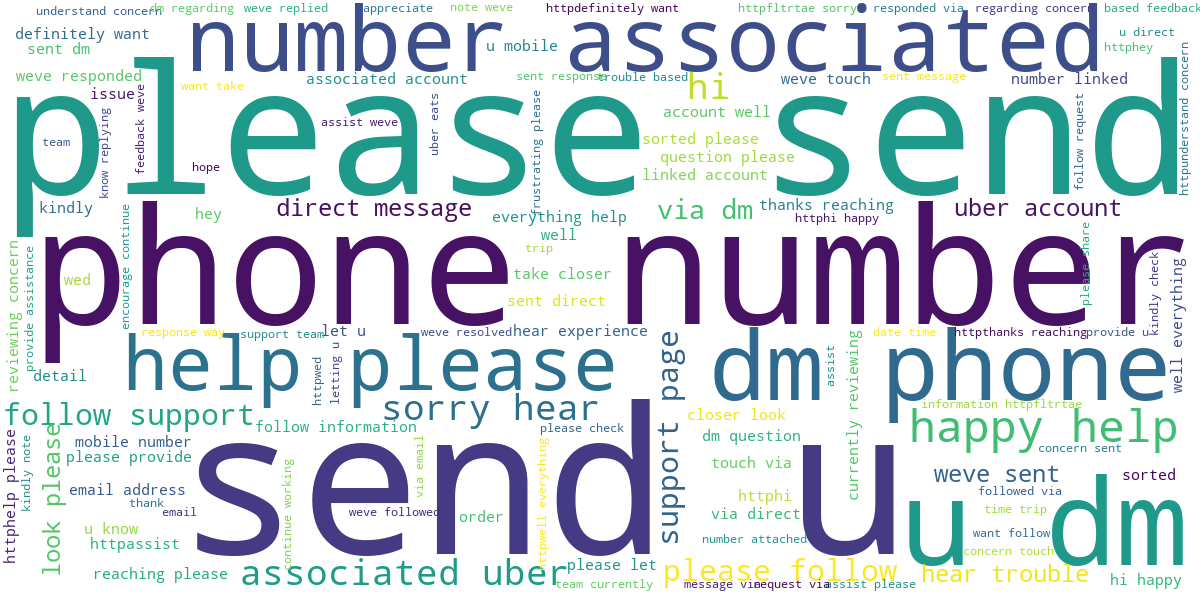

In [49]:
wcloud

In [50]:
LDAvis_prepared = lda(post_from_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.086*"http" + 0.029*"currently" + 0.029*"hi" + 0.026*"please" + 0.023*"support" + 0.019*"uber" + 0.019*"assist" + 0.018*"dm" + 0.018*"help" + 0.017*"team"'), (1, '0.075*"http" + 0.064*"please" + 0.060*"dm" + 0.056*"u" + 0.051*"send" + 0.050*"number" + 0.049*"phone" + 0.035*"help" + 0.031*"associated" + 0.022*"uber"'), (2, '0.100*"http" + 0.055*"please" + 0.041*"follow" + 0.036*"u" + 0.030*"help" + 0.028*"hi" + 0.026*"happy" + 0.026*"support" + 0.023*"like" + 0.022*"page"'), (3, '0.069*"http" + 0.049*"please" + 0.031*"dm" + 0.029*"u" + 0.025*"weve" + 0.024*"reaching" + 0.021*"number" + 0.020*"phone" + 0.020*"thanks" + 0.019*"sorry"'), (4, '0.057*"please" + 0.044*"u" + 0.038*"send" + 0.037*"message" + 0.036*"assist" + 0.033*"dm" + 0.032*"via" + 0.030*"http" + 0.028*"phone" + 0.026*"direct"'), (5, '0.048*"http" + 0.032*"please" + 0.031*"u" + 0.031*"assist" + 0.030*"dm" + 0.030*"via" + 0.028*"message" + 0.024*"number" + 0.022*"direct" + 0.021*"send"'), (6, '0.061*"http" + 0.

In [51]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.007965 -0.084582       1        1  22.469562
8      0.024105 -0.067863       2        1  17.278400
2     -0.068595 -0.013541       3        1  12.903405
6      0.043679  0.081744       4        1   8.023875
4      0.089140 -0.016080       5        1   7.942021
3      0.058975  0.050226       6        1   7.644506
5      0.057421  0.005553       7        1   6.829569
0     -0.099368  0.060228       8        1   6.640555
9     -0.077159 -0.004965       9        1   5.405035
7     -0.020233 -0.010720      10        1   4.863071, topic_info=          Term        Freq       Total Category  logprob  loglift
4         http  776.000000  776.000000  Default  30.0000  30.0000
2       follow  151.000000  151.000000  Default  29.0000  29.0000
78      assist  150.000000  150.000000  Default  28.0000  28.0000
84     support  111.000000  111.000000  Default  27.0000  27.0000
48        help  303.000000  303.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
78      assist    5.362032  150.364610  Topic10  -4.6362  -0.3102
23       phone    6.295513  334.172726  Topic10  -4.4757  -0.9483
18  associated    5.426236  232.832002  Topic10  -4.6243  -0.7356
47  everything    3.605116   35.051346  Topic10  -5.0331   0.7490
2       follow    4.483204  151.759819  Topic10  -4.8152  -0.4985

[734 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
494       7  0.589991       abhisek
480       7  0.798184      abhishek
526       1  0.825770    absolutely
526       7  0.103221    absolutely
299      10  0.567051  accidentally
...     ...       ...           ...
8         8  0.035762         would
8         9  0.071524         would
525       6  0.639631        xolani
72        4  0.287129          zaid
72       10  0.574259          zaid

[1256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 3, 7, 5, 4, 6, 1, 10, 8])

In [52]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_from_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Pre-COVID

In [53]:
pre_uber_df_tk = uber_df_tk[uber_df_tk['created_at'] <= covid_date]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
pre_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source           source_id         target            target_id  \
0      Uber_Support          2815754953  wordofbrandon           2566081240   
1      Uber_Support          2815754953  wordofbrandon           2566081240   
2      Uber_Support          2815754953      CapeVgirl            719534538   
3      Uber_Support          2815754953      CapeVgirl            719534538   
4      SatishInnov8  722043526461145088   Uber_Support           2815754953   
..              ...                 ...            ...                  ...   
659  lordsarcastico           141914172   Uber_Support           2815754953   
660  lordsarcastico           141914172           Uber             19103481   
661  lordsarcastico           141914172          dkhos             41642329   
662    Uber_Support          2815754953       matdel69  1237136270767382529   
663    Uber_Support          2815754953       matdel69  1237136270767382529   

    type_of_content          created_at  \
0             Reply 2019-08-31 10:53:53   
1             Reply 2019-08-31 10:53:53   
2             Reply 2019-10-01 07:45:30   
3             Reply 2019-10-01 07:45:30   
4             Reply 2019-12-09 17:11:51   
..              ...                 ...   
659           Reply 2019-12-31 23:58:55   
660           Reply 2019-12-31 23:58:55   
661           Reply 2019-12-31 23:58:55   
662           Reply 2020-03-09 22:13:45   
663           Reply 2020-03-09 22:13:45   

                                              all_data  \
0    {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
1    {'created_at': 'Sat Aug 31 10:53:53 +0000 2019...   
2    {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
3    {'created_at': 'Tue Oct 01 07:45:30 +0000 2019...   
4    {'created_at': 'Mon Dec 09 17:11:51 +0000 2019...   
..                                                 ...   
659  {'created_at': 'Tue Dec 31 23:58:55 +0000 2019...   
660  {'created_at': 'Tue Dec 31 23:58:55 +0000 2019...   
661  {'created_at': 'Tue Dec 31 23:58:55 +0000 2019...   
662  {'created_at': 'Mon Mar 09 22:13:45 +0000 2020...   
663  {'created_at': 'Mon Mar 09 22:13:45 +0000 2020...   

                                                  text  
0    [wordofbrandon, thanks, bringing, attention, w...  
1    [wordofbrandon, thanks, bringing, attention, w...  
2    [capevgirl, help, suggest, restarting, app, wo...  
3    [capevgirl, help, suggest, restarting, app, wo...  
4    [ubersupport, wish, respectfully, state, regul...  
..                                                 ...  
659  [ubersupport, hi, uber, still, asking, questio...  
660  [ubersupport, hi, uber, still, asking, questio...  
661  [ubersupport, hi, uber, still, asking, questio...  
662  [absolutely, want, take, closer, look, please,...  
663  [absolutely, want, take, closer, look, please,...  

[664 rows x 8 columns]

In [55]:
wcloud = word_cloud(pre_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 47522


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


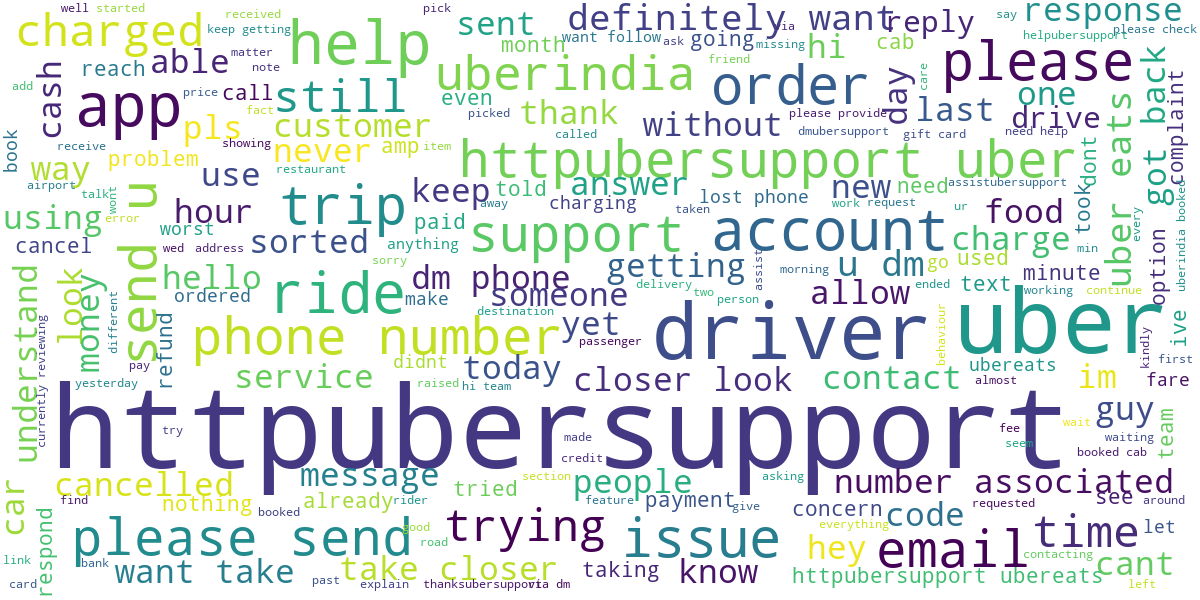

In [56]:
wcloud

In [57]:
LDAvis_prepared = lda(pre_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.085*"ubersupport" + 0.057*"http" + 0.042*"uber" + 0.020*"driver" + 0.011*"phone" + 0.010*"trip" + 0.010*"ride" + 0.009*"support" + 0.009*"customer" + 0.008*"please"'), (1, '0.072*"http" + 0.050*"ubersupport" + 0.026*"uber" + 0.019*"help" + 0.019*"please" + 0.018*"send" + 0.017*"u" + 0.014*"want" + 0.014*"phone" + 0.013*"number"'), (2, '0.067*"ubersupport" + 0.062*"http" + 0.016*"uber" + 0.015*"ride" + 0.012*"hi" + 0.011*"issue" + 0.010*"account" + 0.010*"driver" + 0.009*"trying" + 0.008*"call"'), (3, '0.042*"http" + 0.039*"ubersupport" + 0.018*"driver" + 0.017*"help" + 0.017*"ride" + 0.013*"email" + 0.012*"uber" + 0.012*"bluedonkey" + 0.009*"issue" + 0.009*"please"'), (4, '0.063*"http" + 0.062*"ubersupport" + 0.015*"driver" + 0.013*"uber" + 0.011*"app" + 0.011*"u" + 0.009*"help" + 0.008*"already" + 0.008*"please" + 0.007*"ubereats"'), (5, '0.095*"ubersupport" + 0.058*"http" + 0.027*"uber" + 0.016*"trip" + 0.012*"driver" + 0.012*"account" + 0.009*"please" + 0.008*"help" 

In [58]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.041512 -0.028503       1        1  21.244728
1     -0.098911  0.044709       2        1  17.861602
0      0.038503 -0.034044       3        1  13.618990
4      0.011689  0.123233       4        1   8.354567
6     -0.116380 -0.046671       5        1   8.267697
9     -0.054926 -0.041050       6        1   7.385471
2      0.097514 -0.029636       7        1   7.020434
8      0.031588  0.055068       8        1   6.448326
7      0.024798  0.005496       9        1   5.886567
3      0.024613 -0.048602      10        1   3.911617, topic_info=            Term        Freq       Total Category  logprob  loglift
3           http  395.000000  395.000000  Default  30.0000  30.0000
24   ubersupport  465.000000  465.000000  Default  29.0000  29.0000
43             u   51.000000   51.000000  Default  28.0000  28.0000
48         order   37.000000   37.000000  Default  27.0000  27.0000
153         ride   45.000000   45.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
292      charged    1.586600   20.729192  Topic10  -5.1232   0.6713
144      getting    1.586500   22.187062  Topic10  -5.1233   0.6032
195         trip    1.586571   44.396036  Topic10  -5.1232  -0.0904
210       booked    1.164188   14.477808  Topic10  -5.4328   0.7206
158          cab    1.138851   13.476757  Topic10  -5.4548   0.7703

[681 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
458       1  0.373755     able
458       2  0.053394     able
458       3  0.053394     able
458       5  0.106787     able
458       6  0.106787     able
...     ...       ...      ...
973       3  0.233175       yr
973       4  0.233175       yr
973       6  0.466350       yr
760       4  0.628463  zealand
1012      1  0.613193     über

[1260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 1, 5, 7, 10, 3, 9, 8, 4])

In [59]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Post-COVID

In [60]:
post_uber_df_tk = uber_df_tk[uber_df_tk['created_at'] > covid_date]

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
post_uber_df_tk

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


source            source_id        target            target_id  \
664     Uber_Support           2815754953       fltrtae  1242683484704915457   
665     Uber_Support           2815754953       fltrtae  1242683484704915457   
666     Uber_Support           2815754953       fltrtae  1242683484704915457   
667     Uber_Support           2815754953       fltrtae  1242683484704915457   
668     Uber_Support           2815754953       fltrtae  1242683484704915457   
...              ...                  ...           ...                  ...   
5563        ajb_neuk  1344742630731747328  Uber_Support           2815754953   
5564  AdrianMatache7  1376698104028794882  Uber_Support           2815754953   
5565          k_sovs  1369169148580823040  Uber_Support           2815754953   
5566       MY0U1SANA   918655647763324928  Uber_Support           2815754953   
5567       MY0U1SANA   918655647763324928       fltrtae  1242683484704915457   

     type_of_content          created_at  \
664            Reply 2020-10-17 10:27:36   
665            Reply 2020-10-17 10:27:36   
666            Reply 2020-10-17 10:27:36   
667            Reply 2020-10-17 10:27:36   
668            Reply 2020-10-17 10:27:36   
...              ...                 ...   
5563           Reply 2021-03-31 17:15:48   
5564           Reply 2021-03-31 17:18:34   
5565           Reply 2021-03-31 17:19:01   
5566           Reply 2021-03-31 17:22:01   
5567           Reply 2021-03-31 17:22:01   

                                               all_data  \
664   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
665   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
666   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
667   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
668   {'created_at': 'Sat Oct 17 10:27:36 +0000 2020...   
...                                                 ...   
5563  {'created_at': 'Wed Mar 31 17:15:48 +0000 2021...   
5564  {'created_at': 'Wed Mar 31 17:18:34 +0000 2021...   
5565  {'created_at': 'Wed Mar 31 17:19:01 +0000 2021...   
5566  {'created_at': 'Wed Mar 31 17:22:01 +0000 2021...   
5567  {'created_at': 'Wed Mar 31 17:22:01 +0000 2021...   

                                                   text  
664   [fltrtae, sorry, hear, experience, would, like...  
665   [fltrtae, sorry, hear, experience, would, like...  
666   [fltrtae, sorry, hear, experience, would, like...  
667   [fltrtae, sorry, hear, experience, would, like...  
668   [fltrtae, sorry, hear, experience, would, like...  
...                                                 ...  
5563  [ubersupport, yeah, cause, link, useful, suppo...  
5564  [ubersupport, hi, guy, long, take, bank, accou...  
5565  [ubersupport, filled, form, many, time, response]  
5566                       [ubersupport, fltrtae, hold]  
5567                       [ubersupport, fltrtae, hold]  

[4904 rows x 8 columns]

In [62]:
wcloud = word_cloud(post_uber_df_tk)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total words 320617


C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


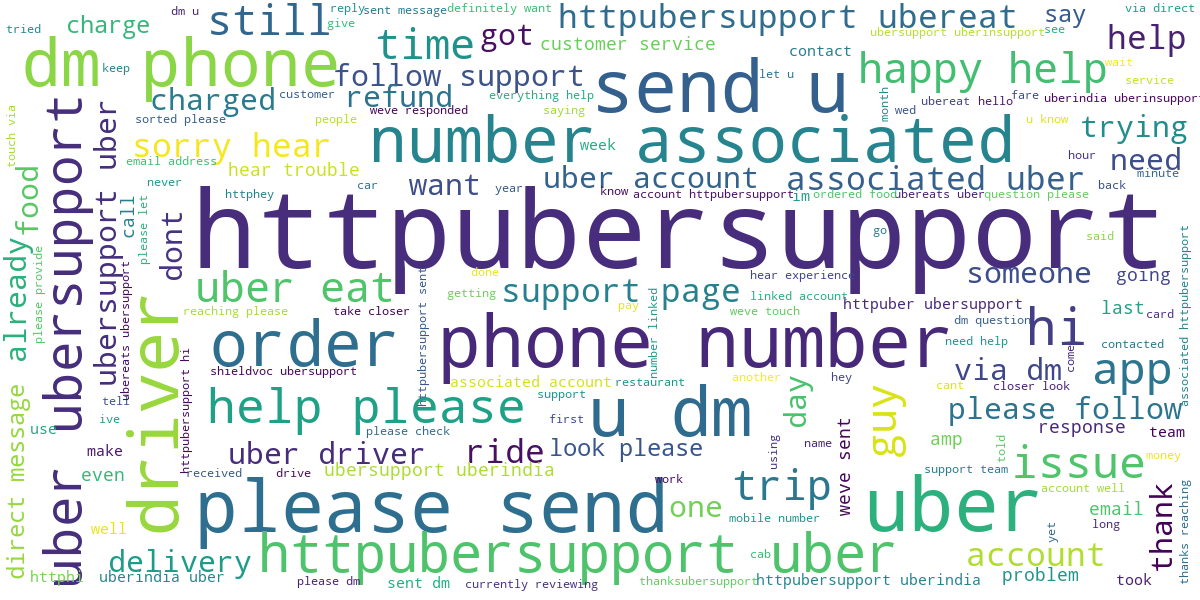

In [63]:
wcloud

In [64]:
LDAvis_prepared = lda(post_uber_df_tk, n_topics=n_topics)

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topics
[(0, '0.116*"ubersupport" + 0.065*"http" + 0.038*"uber" + 0.015*"help" + 0.013*"dm" + 0.013*"driver" + 0.010*"account" + 0.009*"please" + 0.008*"sent" + 0.007*"still"'), (1, '0.076*"ubersupport" + 0.063*"http" + 0.048*"uber" + 0.018*"driver" + 0.012*"ride" + 0.010*"uberindia" + 0.007*"message" + 0.006*"response" + 0.006*"customer" + 0.006*"get"'), (2, '0.065*"http" + 0.057*"ubersupport" + 0.019*"order" + 0.016*"please" + 0.015*"ubereats" + 0.014*"u" + 0.013*"dm" + 0.013*"sent" + 0.011*"uber" + 0.009*"hey"'), (3, '0.078*"ubersupport" + 0.068*"http" + 0.052*"uber" + 0.024*"driver" + 0.017*"uberindia" + 0.015*"help" + 0.013*"support" + 0.009*"please" + 0.007*"get" + 0.007*"hi"'), (4, '0.064*"http" + 0.050*"ubersupport" + 0.038*"please" + 0.025*"u" + 0.023*"send" + 0.018*"dm" + 0.016*"phone" + 0.014*"number" + 0.013*"associated" + 0.012*"trip"'), (5, '0.079*"http" + 0.045*"ubersupport" + 0.043*"please" + 0.033*"number" + 0.033*"uber" + 0.032*"u" + 0.029*"dm" + 0.028*"phone" + 0.027

Topic: 0.079*"ubersupport" + 0.048*"uber" + 0.044*"http" + 0.024*"driver" + 0.017*"hi" + 0.015*"trip" + 0.011*"order" + 0.009*"charged" + 0.008*"ubereats" + 0.008*"dm"

Score: 0.3583883047103882	 
Topic: 0.048*"ubersupport" + 0.045*"uber" + 0.041*"http" + 0.020*"weve" + 0.016*"dm" + 0.016*"driver" + 0.010*"message" + 0.008*"im" + 0.008*"sent" + 0.008*"check"

Score: 0.016674892976880074	 
Topic: 0.079*"http" + 0.045*"ubersupport" + 0.043*"please" + 0.033*"number" + 0.033*"uber" + 0.032*"u" + 0.029*"dm" + 0.028*"phone" + 0.027*"send" + 0.023*"help"

Score: 0.016672860831022263	 
Topic: 0.064*"http" + 0.050*"ubersupport" + 0.038*"please" + 0.025*"u" + 0.023*"send" + 0.018*"dm" + 0.016*"phone" + 0.014*"number" + 0.013*"associated" + 0.012*"trip"

Score: 0.016672663390636444	 
Topic: 0.065*"http" + 0.057*"ubersupport" + 0.019*"order" + 0.016*"please" + 0.015*"ubereats" + 0.014*"u" + 0.013*"dm" + 0.013*"sent" + 0.011*"uber" + 0.009*"hey"

Score: 0.016672659665346146	 
Topic: 0.116*"ubersupp

In [65]:
LDAvis_prepared

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.024152  0.029136       1        1  22.717576
5      0.135926  0.011102       2        1  18.228927
3     -0.039634  0.040005       3        1  10.868484
2      0.055053 -0.010237       4        1   7.944605
7     -0.052134  0.089082       5        1   7.778302
4      0.104923 -0.002374       6        1   7.398817
8     -0.056986 -0.072001       7        1   7.035409
6     -0.006717 -0.049991       8        1   6.623008
1     -0.060724  0.025274       9        1   6.577070
9     -0.055554 -0.059996      10        1   4.827803, topic_info=            Term         Freq        Total Category  logprob  loglift
31          uber  1598.000000  1598.000000  Default  30.0000  30.0000
63   ubersupport  3457.000000  3457.000000  Default  29.0000  29.0000
25          send   345.000000   345.000000  Default  28.0000  28.0000
24        please   774.000000   774.000000  Default  27.0000  27.0000
4           http  2959.000000  2959.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
48          help    11.997678   549.818860  Topic10  -5.2251  -0.7941
226     customer     8.422156   131.953149  Topic10  -5.5790   0.2792
11           get     9.053801   273.389226  Topic10  -5.5067  -0.3769
131      support     8.829466   289.881533  Topic10  -5.5318  -0.4606
254    uberindia     8.581385   276.777417  Topic10  -5.5603  -0.4428

[795 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2135      4  0.705884  abkgardner
194       1  0.451236        able
194       2  0.075206        able
194       3  0.094008        able
194       4  0.150412        able
...     ...       ...         ...
209      10  0.148109       worst
1850      4  0.244913          yr
1850      8  0.489827          yr
2816      3  0.649103        zoom
2816      6  0.216368        zoom

[2061 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 4, 3, 8, 5, 9, 7, 2, 10])

In [66]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_lda_n{}.html'.format(n_topics))

C:\Users\18199\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
